In [90]:
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import seaborn as sns

In [91]:
df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [93]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [94]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [95]:
df.shape


(19735, 29)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f47bb231090>,
      dtype=object)

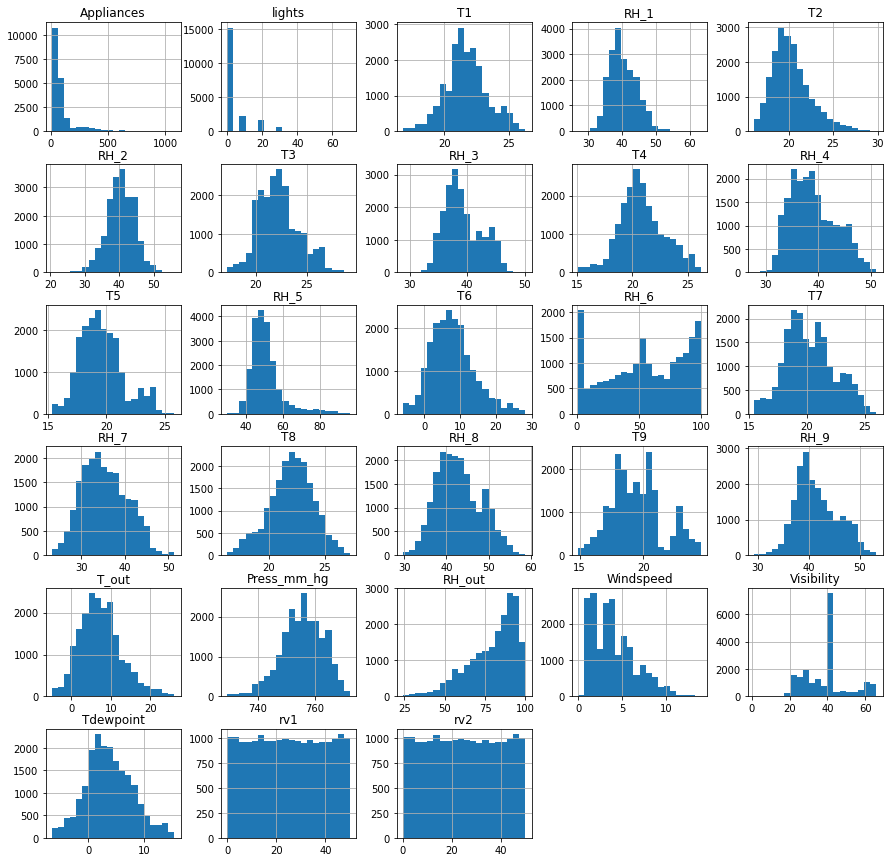

In [96]:
df.hist(bins =20, figsize=(15,15))


In [97]:
# dropping date and lights column and setting Applicances column as target 

df = df.drop(columns = ['date', 'lights'], axis = 1)

In [98]:
# Question 12: What is the R^2 value in two decimal places?

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
target = normalised_df['T6']
feature = normalised_df['T2']

x_train, x_test, y_train, y_test = train_test_split(feature.to_frame(),target, test_size=0.3, random_state=42)

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_values = linear_model.predict(x_test)


r2_score = r2_score(y_test, predicted_values)
print("Question 12: R^2 is " + str(round(r2_score, 2)))


Question 12: R^2 is 0.64


In [99]:
# Question 13: What is the Mean Absolute Error in two decimal places? 

scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
feature = normalised_df.drop(columns=['Appliances'])
target = normalised_df['Appliances']



X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size = 0.3, random_state = 42)


linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

predicted_values = linear_model.predict(X_test)


In [100]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predicted_values)

print("Question 13: MAE is equal to " + str(round(mae, 2)))

Question 13: MAE is equal to 0.05


In [101]:
# Question 14: What is the Residual Sum of Squares in two decimal places? 

rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)
print("Question 14: RSS is equal to " + str(round(rss, 2)))

Question 14: RSS is equal to 45.35


In [102]:
# Question 15: What is the Root Mean Squared Error in three decimal places?

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 
print("Question 15: RMSE is equal to " + str(round(rmse, 3)))

Question 15: RMSE is equal to 0.088


In [103]:
# Question 16: What is the Coefficient of Determination in two decimal places?


from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)
print("Question 16: Coefficient of Determination (R^2) is equal to " + str(round(r2_score, 2)))

Question 16: Coefficient of Determination (R^2) is equal to 0.15


In [104]:
# Question 17: Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

def get_weights_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_weights_df = get_weights_df(linear_model, X_train, 'Linear_weight')

linear_weights_df


,Features,Linear_weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


In [105]:
# Question 18: Train a ridge regression model with an alpha value of 0.4. Did RMSE change?

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

print('RMSE did not change despite training a ridge regression model with an alpha valeu of 0.4')

RMSE did not change despite training a ridge regression model with an alpha valeu of 0.4


In [106]:
# Question 19: Train lasso regression model with alpha value of 0.001. How many features have non-zero feature weights?

from sklearn.linear_model import Lasso


lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
lasso_preds = lasso_reg.predict(X_test)

lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')

non_zero_weights = lasso_weights_df[lasso_weights_df['Lasso_weight'] != 0]
print(non_zero_weights)

print('There are four features with non-zero weights')

     Features  Lasso_weight
0      RH_out     -0.049557
1        RH_8     -0.000110
24  Windspeed      0.002912
25       RH_1      0.017880
There are four features with non-zero weights


In [107]:
# Question 20: Calculate new RMSE with lasso regression with three decimal places.

rmse = np.sqrt(mean_squared_error(y_test, lasso_preds))
round(rmse, 3) 

print("Question 20: New calculated RMSE after lasso regression is equal to " + str(round(rmse, 3)))

Question 20: New calculated RMSE after lasso regression is equal to 0.094
